**Introduction**

This is an exercise on pandas, graphs and a little statistics.  The main goal is to get an insight on the difference on Filipino Household Total Income based on who is the head of the family - male or female. 

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats

# Any results you write to the current directory are saved as output.

['Family Income and Expenditure.csv']


**Loading and Inspecting the Data**

In [12]:
raw_data = pd.read_csv('../input/Family Income and Expenditure.csv')
print('Shape: ', raw_data.shape)
#print('Columns: ', raw_data.columns)
print('Household Head Sex (HHS): ', raw_data['Household Head Sex'].unique())
print('Number of rows per HHS: ', raw_data.groupby('Household Head Sex')['Household Head Sex'].count())

print('Region: ', raw_data['Household Head Sex'].unique())
print('Number of rows per Region: ', raw_data.groupby('Region')['Region'].count())

Shape:  (41544, 60)
Household Head Sex (HHS):  ['Female' 'Male']
Number of rows per HHS:  Household Head Sex
Female     9061
Male      32483
Name: Household Head Sex, dtype: int64
Region:  ['Female' 'Male']
Number of rows per Region:  Region
 ARMM                        2248
CAR                          1725
Caraga                       1782
I - Ilocos Region            2348
II - Cagayan Valley          2219
III - Central Luzon          3237
IVA - CALABARZON             4162
IVB - MIMAROPA               1249
IX - Zasmboanga Peninsula    1788
NCR                          4130
V - Bicol Region             2472
VI - Western Visayas         2851
VII - Central Visayas        2541
VIII - Eastern Visayas       2337
X - Northern Mindanao        1887
XI - Davao Region            2446
XII - SOCCSKSARGEN           2122
Name: Region, dtype: int64


**Comparing Data by Household Head Sex (HHS)**

In [3]:
female = raw_data[raw_data['Household Head Sex'] == 'Female']
female_rowcount = len(female.index)
male = raw_data[raw_data['Household Head Sex'] == 'Male']
male_rowcount = len(male.index)
print('HOUSEHOLD HEAD SEX (HHS)')
print ('Number of rows where HHS is Female: ', female_rowcount, 'Percentage: ', "{:.2%}".format(female_rowcount/(female_rowcount+male_rowcount)))
print ('Number of rows where HHS is Male: ', male_rowcount, 'Percentage: ', "{:.2%}".format(male_rowcount/(female_rowcount+male_rowcount)))
print('TOTAL HOUSEHOLD INCOME (THI)')
print ('Mean THI where HHS is Female: ', "{:,.2f}".format(female['Total Household Income'].mean()))
print ('Mean THI where HHS is Male: ', "{:,.2f}".format(male['Total Household Income'].mean()))


HOUSEHOLD HEAD SEX (HHS)
Number of rows where HHS is Female:  9061 Percentage:  21.81%
Number of rows where HHS is Male:  32483 Percentage:  78.19%
TOTAL HOUSEHOLD INCOME (THI)
Mean THI where HHS is Female:  262,804.55
Mean THI where HHS is Male:  243,301.95


[Text(0, 0, '-2,000,000.0'),
 Text(0, 0, '0.0'),
 Text(0, 0, '2,000,000.0'),
 Text(0, 0, '4,000,000.0'),
 Text(0, 0, '6,000,000.0'),
 Text(0, 0, '8,000,000.0'),
 Text(0, 0, '10,000,000.0'),
 Text(0, 0, '12,000,000.0'),
 Text(0, 0, '14,000,000.0')]

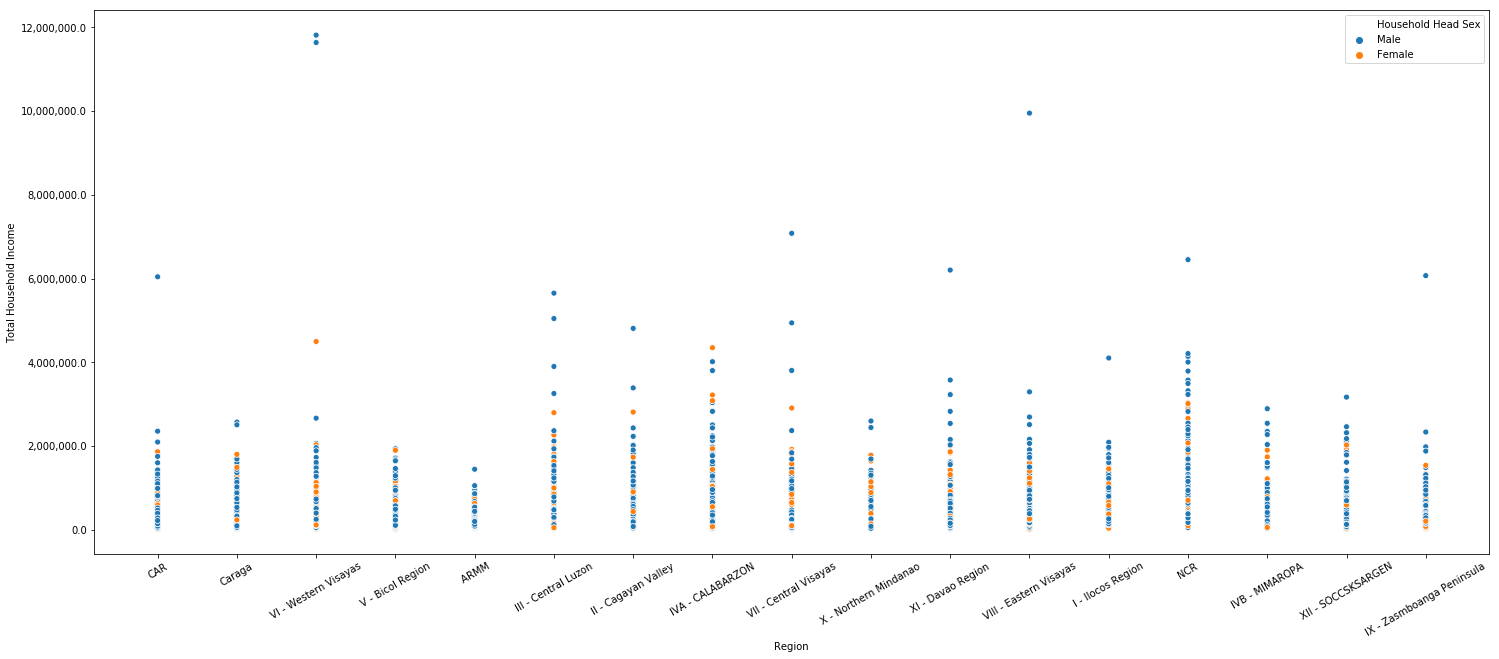

In [4]:
plt.figure(figsize=(25,10))
#plt.ylim(0, 5000000)
plt.xticks(rotation=30)
#plt.axes.ticklabel_format(axis='y', style='plain')
graph = sns.scatterplot(x=raw_data['Region'], y=raw_data['Total Household Income'], hue=raw_data['Household Head Sex'], hue_order=['Male', 'Female'])
ylabels = ['{:,}'.format(y) for y in graph.get_yticks()]
graph.set_yticklabels(ylabels)


In [5]:
femalebyreg = female.groupby('Region')['Household Head Sex'].count().to_frame()
femalebyreg.rename(columns={'Household Head Sex': 'Female HHS Count'}, inplace=True)
#print(femalebyreg)
malebyreg = male.groupby('Region')['Household Head Sex'].count().to_frame()
malebyreg.rename(columns={'Household Head Sex': 'Male HHS Count'}, inplace=True)
#print(malebyreg)
femalebyregincome = female.groupby('Region')['Total Household Income'].mean().to_frame()
femalebyregincome.rename(columns={'Total Household Income': 'Female THI Mean'}, inplace=True)
#print(femalebyregincome)
malebyregincome = male.groupby('Region')['Total Household Income'].mean().to_frame()
malebyregincome.rename(columns={'Total Household Income': 'Male THI Mean'}, inplace=True)
#print(malebyregincome)
hhsbyreg = pd.concat([femalebyreg, malebyreg, femalebyregincome, malebyregincome], axis=1)
#print(hhsbyreg.columns)
hhsbyreg['Diff in THI Mean'] = hhsbyreg['Female THI Mean'] - hhsbyreg['Male THI Mean'] 
print(hhsbyreg[['Female THI Mean', 'Male THI Mean']])

                           Female THI Mean  Male THI Mean
Region                                                   
 ARMM                        140130.836257  134303.549831
CAR                          292991.111111  263159.008850
Caraga                       194213.060519  197558.894077
I - Ilocos Region            235110.246847  239038.645287
II - Cagayan Valley          214934.736211  241833.012764
III - Central Luzon          299443.003861  290919.137805
IVA - CALABARZON             312022.761770  300393.025161
IVB - MIMAROPA               210793.101504  218279.507630
IX - Zasmboanga Peninsula    183597.841808  192828.443515
NCR                          403787.237691  427675.515583
V - Bicol Region             193661.173451  183866.919245
VI - Western Visayas         238996.426791  215100.211408
VII - Central Visayas        263132.511278  224904.822495
VIII - Eastern Visayas       199082.639640  196186.316957
X - Northern Mindanao        223017.167500  211647.722260
XI - Davao Reg

In [6]:
hhsbyreg['Female THI Mean'] - hhsbyreg['Male THI Mean'] 

Region
 ARMM                         5827.286426
CAR                          29832.102262
Caraga                       -3345.833558
I - Ilocos Region            -3928.398440
II - Cagayan Valley         -26898.276553
III - Central Luzon           8523.866056
IVA - CALABARZON             11629.736609
IVB - MIMAROPA               -7486.406126
IX - Zasmboanga Peninsula    -9230.601707
NCR                         -23888.277892
V - Bicol Region              9794.254206
VI - Western Visayas         23896.215383
VII - Central Visayas        38227.688784
VIII - Eastern Visayas        2896.322682
X - Northern Mindanao        11369.445240
XI - Davao Region            12858.679635
XII - SOCCSKSARGEN           -5750.511160
dtype: float64

262804.55225692526 271483.6113119324


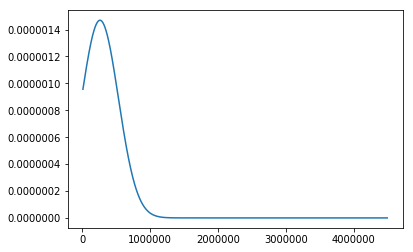

In [30]:
# Both datasets do not follow normal distribution

#income = male['Total Household Income'].tolist()
income = female['Total Household Income'].tolist()
income.sort()
incomemean = np.mean(income)
incomestd = np.std(income)
print(incomemean, incomestd)
fit = stats.norm.pdf(income, incomemean, incomestd)
plt.plot(income, fit)
plt.show()

**Hypothesis**  
Household Total Income is higher if Household Head is Female

In [34]:
t, p = ttest_ind(female['Total Household Income'], male['Total Household Income'])
different = "Reject NULL Hypothesis" if p < 0.01 else "NULL Hypothesis can't be rejected"
print("t test results, p is compared to 0.01")
print ("t = ", t)
print ("p = ", p)
print("Conclusion: ", different)

t test results, p is compared to 0.01
t =  5.72426213035466
p =  1.045980321132843e-08
Conclusion:  Reject NULL Hypothesis
